In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

In [2]:
# path for read to use
rides_path = 'Resources\\ride_data.csv'
cities_path = 'Resources\\city_data.csv'
# pandas reading the csv files
ride_data_df = pd.read_csv(rides_path)
city_data_df = pd.read_csv(cities_path)

In [3]:
# are there any nans? nope
city_data_df.isna().value_counts()
# expected types? yes
city_data_df.dtypes
# what are the types of cities
city_data_df['type'].unique()
# number of each
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [4]:
# merge the two dfs
ride_city_df = pd.merge(ride_data_df, city_data_df)
ride_city_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


# Plan
* Create a bubble chart that showcases the average fare versus the total number of rides with bubble  size based on the total number of drivers for each city type, including urban, suburban, and rural.
* Determine the mean, median, and mode for the following:
    * The total number of rides for each city type.
    * The average fares for each city type.
    * The total number of drivers for each city type.
* Create box-and-whisker plots that visualize each of the following to determine if there are any     outliers:
    * The number of rides for each city type.
    * The fares for each city type.
    * The number of drivers for each city type.
* Create a pie chart that visualizes each of the following data for each city type:
    * The percent of total fares.
    * The percent of total rides.
    * The percent of total drivers.

# Bubble Chart

In [5]:
# filters for bubble chart groups
urban_df = ride_city_df[ride_city_df["type"] == "Urban"]
suburban_df = ride_city_df[ride_city_df["type"] == "Suburban"]
rural_df = ride_city_df[ride_city_df["type"] == "Rural"]

In [6]:
# creating a Series populated by the avg fare per city (Y-axis) for each type
avg_fare_u = urban_df.groupby(['city'])['fare'].mean()
avg_fare_s = suburban_df.groupby(['city'])['fare'].mean()
avg_fare_r = rural_df.groupby(['city'])['fare'].mean()

In [7]:
# creating a Series for the number of drivers per city for each type
avg_driver_u = urban_df.groupby(['city'])['driver_count'].mean()
avg_driver_s = suburban_df.groupby(['city'])['driver_count'].mean()
avg_driver_r = rural_df.groupby(['city'])['driver_count'].mean()

In [8]:
# creating a Series for the number of rides per city in each type
ride_count_u = urban_df.groupby(['city'])['ride_id'].count()
ride_count_s = suburban_df.groupby(['city'])['ride_id'].count()
ride_count_r = rural_df.groupby(['city'])['ride_id'].count()

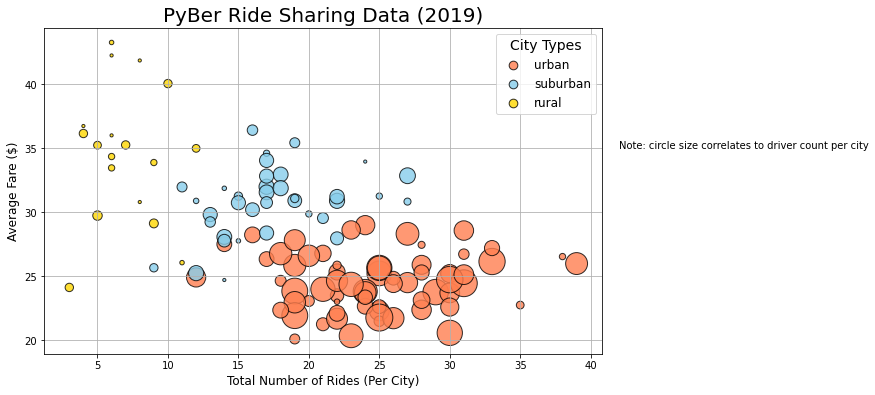

In [9]:
# changing the size of the plot
plt.subplots(figsize=(10, 6))

# building the scatter plot for urban cities
plt.scatter(ride_count_u, avg_fare_u, s=avg_driver_u*10, c='coral', edgecolor='black', linewidths=1, alpha=.8, label='urban')
# build the scatter for the suburban cities
plt.scatter(ride_count_s, avg_fare_s, s=avg_driver_s*10, c='skyblue', edgecolor='black', linewidths=1, alpha=.8, label='suburban')
# build the scatter for the rural
plt.scatter(ride_count_r, avg_fare_r, s=avg_driver_r*10, c='gold', edgecolor='black', linewidths=1, alpha=.8, label='rural')

plt.title('PyBer Ride Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# legend formatting
lgnd = plt.legend(fontsize=12, mode='Expanded', scatterpoints=1, loc='best', title='City Types', title_fontsize=14)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# adding in the note
plt.text(42, 35, 'Note: circle size correlates to driver count per city')
plt.savefig('Analysis/Fig1.png')

plt.show()

# Statistical Analysis

In [10]:
# urban statistics
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [11]:
# suburban statistics
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [12]:
# rural statistics
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [13]:
# describing ride counts starting with urban
ride_count_u.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [14]:
ride_count_s.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [15]:
ride_count_r.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [16]:
# using the pandas mean() function
round(ride_count_u.mean(),2), round(ride_count_s.mean(),2), round(ride_count_r.mean(),2)

(24.62, 17.36, 6.94)

In [17]:
# using pandas median function
round(ride_count_u.median(),2), round(ride_count_s.median(),2), round(ride_count_r.median(),2)

(24.0, 17.0, 6.0)

In [18]:
# using the mode()
print(f'{ride_count_u.mode()} \n {ride_count_s.mode()} \n {ride_count_r.mode()}')

0    22
1    25
dtype: int64 
 0    17
dtype: int64 
 0    6
dtype: int64


In [19]:
# using numpy and scipy for the measures of central tendency on the ride_count
print(f"Urban Mean:    {np.mean(ride_count_u):.2f}")
print(f"Median:        {np.median(ride_count_u)}")
print(f"Mode:          {sts.mode(ride_count_u)}")

Urban Mean:    24.62
Median:        24.0
Mode:          ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [20]:
# suburban
print(f"Suburban Mean:    {np.mean(ride_count_s):.2f}")
print(f"Median:        {np.median(ride_count_s)}")
print(f"Mode:          {sts.mode(ride_count_s)}")

Suburban Mean:    17.36
Median:        17.0
Mode:          ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [21]:
# rural
print(f"Rural Mean:    {np.mean(ride_count_r):.2f}")
print(f"Median:        {np.median(ride_count_r)}")
print(f"Mode:          {sts.mode(ride_count_r)}")

Rural Mean:    6.94
Median:        6.0
Mode:          ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [22]:
# summary stats for fare
# urban
print(f"Urban Mean:    {np.mean(urban_df.fare):.2f}")
print(f"Median:        {np.median(urban_df.fare)}")
print(f"Mode:          {sts.mode(urban_df.fare)}")

Urban Mean:    24.53
Median:        24.64
Mode:          ModeResult(mode=array([22.86]), count=array([5]))


In [23]:
# suburban
print(f"Suburban Mean: {np.mean(suburban_df.fare):.2f}")
print(f"Median:        {np.median(suburban_df.fare)}")
print(f"Mode:          {sts.mode(suburban_df.fare)}")

Suburban Mean: 30.97
Median:        30.75
Mode:          ModeResult(mode=array([17.99]), count=array([3]))


In [24]:
# rural
print(f"Rural Mean:    {np.mean(rural_df.fare):.2f}")
print(f"Median:        {np.median(rural_df.fare)}")
print(f"Mode:          {sts.mode(rural_df.fare)}")

Rural Mean:    34.62
Median:        37.05
Mode:          ModeResult(mode=array([37.05]), count=array([2]))


In [25]:
# driver count summaries
print(f"Urban Mean:    {np.mean(urban_df.driver_count):.2f}")
print(f"Median:        {np.median(urban_df.driver_count)}")
print(f"Mode:          {sts.mode(urban_df.driver_count)}")

Urban Mean:    36.68
Median:        37.0
Mode:          ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [26]:
# suburban
print(f"Suburban Mean:    {np.mean(suburban_df.driver_count):.2f}")
print(f"Median:        {np.median(suburban_df.driver_count)}")
print(f"Mode:          {sts.mode(suburban_df.driver_count)}")

Suburban Mean:    13.71
Median:        16.0
Mode:          ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [27]:
# rural
print(f"Rural Mean:    {np.mean(rural_df.driver_count):.2f}")
print(f"Median:        {np.median(rural_df.driver_count)}")
print(f"Mode:          {sts.mode(rural_df.driver_count)}")

Rural Mean:    4.30
Median:        4.0
Mode:          ModeResult(mode=array([1], dtype=int64), count=array([32]))


# Stats Plots

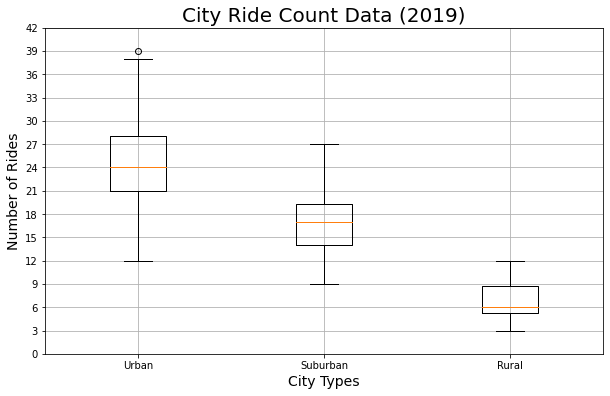

In [28]:
# ride count for urban cities boxplot
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [ride_count_u, ride_count_s, ride_count_r]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)

# title, y-axis, label, and grid
ax.set_title('City Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 45, 3))
ax.grid()

plt.savefig('Analysis/Fig2.png')
plt.show()

In [29]:
# finding the outlier
print(f'{ride_count_u[ride_count_u == 39].index[0]} has the highest rider count')

West Angela has the highest rider count


In [30]:
urban_fares = urban_df['fare']
suburban_fares = suburban_df['fare']
rural_fares = rural_df['fare']

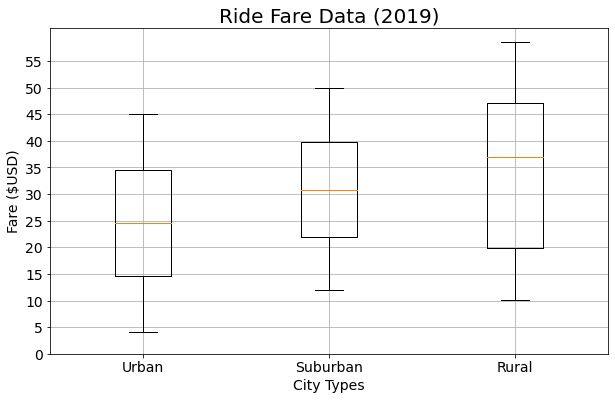

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [39]:
# ride fare data plot
x_labels = ['Urban', 'Suburban', 'Rural']
fare_data =  [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)
# title and axis labels and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 60, 5))
ax.grid()

plt.savefig('Analysis/Fig3.png')
plt.show()
print('Summary Statistics')
urban_fares.describe()

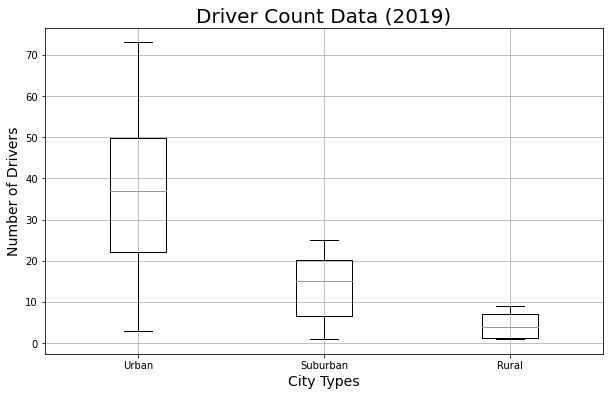

In [32]:
# driver count data boxplots
fig, ax = plt.subplots(figsize=(10, 6))
driver_data =[avg_driver_u, avg_driver_s, avg_driver_r]
x_labels = ['Urban', 'Suburban', 'Rural']
ax.boxplot(driver_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.grid()

plt.savefig('Analysis/Fig4.png')
plt.show()

# Pie Charts

In [33]:
fare_sums = ride_city_df.groupby('type').sum()['fare']
total_fare = ride_city_df['fare'].sum()

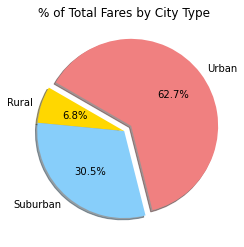

In [34]:
# % total fare by city pie chart

import matplotlib as mpl

fare_by_type = fare_sums * 100 / total_fare
plt.pie(fare_by_type,
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size'] = 14

plt.savefig('Analysis/Fig5.png')
plt.show()

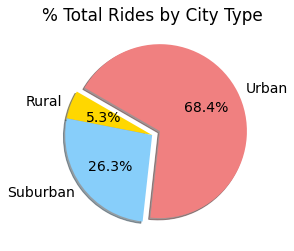

In [35]:
# total rides by city type

ride_by_type = ride_city_df.groupby('type').count()['ride_id'] * 100 / ride_city_df.count()['ride_id']
plt.pie(ride_by_type,
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% Total Rides by City Type')
mpl.rcParams['font.size'] = 14

plt.savefig('Analysis/Fig6.png')
plt.show()

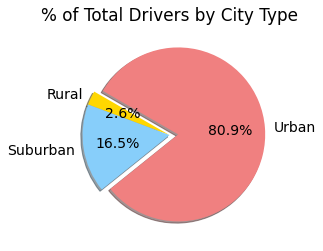

In [36]:
# % of total drivers by type

drivers_by_type = city_data_df.groupby('type').sum()['driver_count'] * 100 / city_data_df['driver_count'].sum()
plt.pie(drivers_by_type,
       labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150
       )
plt.title('% of Total Drivers by City Type')
mpl.rcParams['font.size'] = 14

plt.savefig('Analysis/Fig7.png')
plt.show()